# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organizing Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

## Challenge

In this challenge, you need to implement a SOM such that it can categorise a set of random 3-dimensional colours.  The output should be an image of the organised data.  

### Expectations
- You are expected to detail your decisions & thinking in comments
- You may use any language you like (although the examples given below are using Python)
- avoid using too many libraries that would do too much of the work for you.
- You can use code below to generate the trainig data of 10 colours:

### 1. Implement a Kohonen network
- Use the above description to implement a Kohonen network
- Make sure you can configure the size of the input vector and the size of the map
- Make sure node's weights are initialized to random values

In [1]:
# Implement the network...
import random
import math
import numpy as np
import datetime

# Generate Kohonen network
def kohonen_network(n, size_X, size_Y):
    """Return a kohonen netowrk with widith size_X, lenght size_Y and dimensial n.
    """
    kohonen = np.random.random((size_X,size_Y,n))
    return kohonen

In [2]:
def euclidean_distance(arr1, arr2):
    """Return the euclidean distance of two arrays
    """
    dist = np.linalg.norm(arr1-arr2)
    return dist

def position(index):
    """Return the x and y index of a integer in a kohonen network with size of size_X*size_Y
    """
    x_index = index//size_X
    y_index = index%size_X
    return np.array([x_index, y_index]) 

def index_to_weight(index,kohonen):
    """Return a weight vector in the kohonen by its index
    """
    x_index = index//size_X
    y_index = index%size_X
    return kohonen[x_index][y_index]

In [3]:
def update_weight(BMU,t):
    """Updates all the neighbour nodes' weights of a BMU in iteration t.
    """
    # Calculating the Neighbourhood Radius
    sigma_t = sigma_0*math.e**(-t/lambda_)

    # Calculating the learning rate
    alpha_t = alpha_0*math.e**(-t/lambda_)

    # Find all neighbour nodes of BMU and update their weights
    for current_node in range(size_X*size_Y):
        if  euclidean_distance(position(current_node),position(BMU)) < sigma_t: # means it is in its neighbour
            d_i = euclidean_distance(position(BMU),position(current_node)) # remeber here is the position
            theta_t = math.e**(-d_i*d_i/(2*sigma_t*sigma_t)) # Calculating the influence
            current_X = current_node//size_X
            current_Y = current_node%size_X
            # Updating the weights
            kohonen[current_X][current_Y] = kohonen[current_X][current_Y] + alpha_t*theta_t*(current_input_vector - kohonen[current_X][current_Y])

### 2. Train a 10x10 network over 100 iterations

- Training data is a random set of 20 colours
- How long does this take?
- What does the map look like? (You will need to translate the weights of each node in the map to pixel data)

In [4]:
#initialize parameters:sigma - radius, alpha - learning rate, theta - influence
size_X = 10
size_Y = 10
max_iterations = 100
sigma_0 = max(size_X,size_Y)/2
alpha_0 = 0.1
lambda_ = max_iterations/math.log(sigma_0)

In [5]:
# generating kohonen network
np.random.seed =42
n = 3
kohonen = kohonen_network(n, size_X, size_Y)

# Generate Traing Data
train_data_size = 20
train_data = np.random.random((train_data_size,3))

training time is 0.164898 seconds with 100 iterations in the 10 * 10 kohonen network
Visulisation with 100 iterations of the 10 * 10 kohonen network


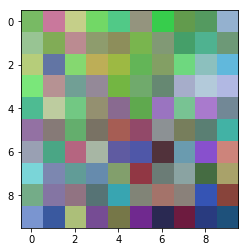

In [6]:
# updating weights
a = datetime.datetime.now()
for t in range(1,max_iterations+1): # t is the current iteration t = 1,2,3,..max_iteration
    current_input_vector = train_data[(t-1)%train_data_size]
    temp_dist = []
    for i in range(size_X*size_Y):
        x_index = i//size_X
        y_index = i%size_X
        dist = euclidean_distance(current_input_vector,kohonen[x_index][y_index])
        temp_dist.append(dist)
    BMU = temp_dist.index(min(temp_dist))
    update_weight(BMU,t)
b = datetime.datetime.now()
print("training time is",(b-a).total_seconds(), "seconds with", max_iterations, "iterations in the",size_X,"*",size_Y,"kohonen network")

# visulisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(kohonen)
print("Visulisation with", max_iterations, "iterations of the",size_X,"*",size_Y,"kohonen network")

- What does this look like if you perform 200 & 500 iterations?

training time is 0.303514 seconds with 200 iterations in the 10 * 10 kohonen network
Visulisation with 200 iterations of the 10 * 10 kohonen network


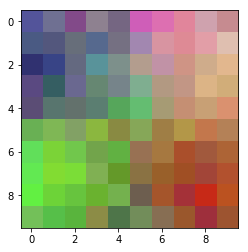

In [7]:
#initialize parameters:sigma - radius, alpha - learning rate, theta - influence
size_X = 10
size_Y = 10
max_iterations = 200
sigma_0 = max(size_X,size_Y)/2
alpha_0 = 0.1
lambda_ = max_iterations/math.log(sigma_0)

# generating kohonen network
np.random.seed =42
n = 3
kohonen = kohonen_network(n, size_X, size_Y)

# Generate Traing Data
train_data_size = 20
train_data = np.random.random((train_data_size,3))

# updating weights
a = datetime.datetime.now()
for t in range(1,max_iterations+1): # t is the current iteration t = 1,2,3,..max_iteration
    current_input_vector = train_data[(t-1)%train_data_size]
    temp_dist = []
    for i in range(size_X*size_Y):
        x_index = i//size_X
        y_index = i%size_X
        dist = euclidean_distance(current_input_vector,kohonen[x_index][y_index])
        temp_dist.append(dist)
    BMU = temp_dist.index(min(temp_dist))
    update_weight(BMU,t)
b = datetime.datetime.now()
print("training time is",(b-a).total_seconds(), "seconds with", max_iterations, "iterations in the",size_X,"*",size_Y,"kohonen network")

# visulisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(kohonen)
print("Visulisation with", max_iterations, "iterations of the",size_X,"*",size_Y,"kohonen network")

training time is 0.742866 seconds with 500 iterations in the 10 * 10 kohonen network
Visulisation with 500 iterations of the 10 * 10 kohonen network


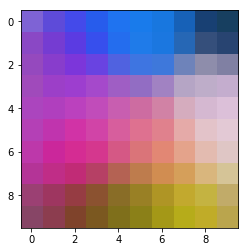

In [8]:
#initialize parameters:sigma - radius, alpha - learning rate, theta - influence
size_X = 10
size_Y = 10
max_iterations = 500
sigma_0 = max(size_X,size_Y)/2
alpha_0 = 0.1
lambda_ = max_iterations/math.log(sigma_0)

# generating kohonen network
np.random.seed =42
n = 3
kohonen = kohonen_network(n, size_X, size_Y)

# Generate Traing Data
train_data_size = 20
train_data = np.random.random((train_data_size,3))

# updating weights
a = datetime.datetime.now()
for t in range(1,max_iterations+1): # t is the current iteration t = 1,2,3,..max_iteration
    current_input_vector = train_data[(t-1)%train_data_size]
    temp_dist = []
    for i in range(size_X*size_Y):
        x_index = i//size_X
        y_index = i%size_X
        dist = euclidean_distance(current_input_vector,kohonen[x_index][y_index])
        temp_dist.append(dist)
    BMU = temp_dist.index(min(temp_dist))
    update_weight(BMU,t)
b = datetime.datetime.now()
print("training time is",(b-a).total_seconds(), "seconds with", max_iterations, "iterations in the",size_X,"*",size_Y,"kohonen network")

# visulisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(kohonen)
print("Visulisation with", max_iterations, "iterations of the",size_X,"*",size_Y,"kohonen network")

### 3. Train a 100x100 network over 1000 iterations

- This network will likely be significantly slower to train
- What could you do to improve performance?
- What does the network look like after 1000 iterations?

You should end up with something like below:

training time is 145.862167 seconds with 1000 iterations in the 100 * 100 kohonen network
Visulisation with 1000 iterations of the 100 * 100 kohonen network


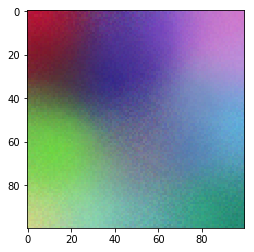

In [9]:
#initialize parameters:sigma - radius, alpha - learning rate, theta - influence
size_X = 100
size_Y = 100
max_iterations = 1000
sigma_0 = max(size_X,size_Y)/2
alpha_0 = 0.1
lambda_ = max_iterations/math.log(sigma_0)

# generating kohonen network
np.random.seed =42
n = 3
kohonen = kohonen_network(n, size_X, size_Y)

# Generate Traing Data
train_data_size = 20
train_data = np.random.random((train_data_size,3))

# updating weights
a = datetime.datetime.now()
for t in range(1,max_iterations+1): # t is the current iteration t = 1,2,3,..max_iteration
    current_input_vector = train_data[(t-1)%train_data_size]
    temp_dist = []
    for i in range(size_X*size_Y):
        x_index = i//size_X
        y_index = i%size_X
        dist = euclidean_distance(current_input_vector,kohonen[x_index][y_index])
        temp_dist.append(dist)
    BMU = temp_dist.index(min(temp_dist))
    update_weight(BMU,t)
b = datetime.datetime.now()
print("training time is",(b-a).total_seconds(), "seconds with", max_iterations, "iterations in the",size_X,"*",size_Y,"kohonen network")

# visulisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(kohonen)
print("Visulisation with", max_iterations, "iterations of the",size_X,"*",size_Y,"kohonen network")

#### What could you do to improve performance?
According to the several visualisation results, similar data (weights) tend to gather together based on the training data. Thus, we could:
1. Select N input vectors from the training such that they have the farthest average distance between each pair. 
2. Use the N selected vectors to divide the Kohonen network into different partitions by Kd-tree or binary space partitioning tree algorithm.
3. Train each partition separately. As the size of the partition is much smaller than the original one, the training time can be largely reduced.